In [1]:
import os
import sys
import tensorflow as tf
os.chdir('/local/home/dhaziza/entrack')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"
sys.path.append('/local/home/dhaziza/entrack/')

from modules.configparse import ConfigParser
config = ConfigParser().parse('configs/example_config.yaml')
config

{'class': src.estimator.Estimator,
 'params': {'config': {'keep_checkpoint_max': 5,
   'log_step_count_steps': 100,
   'save_checkpoints_steps': 100,
   'save_summary_steps': 1,
   'tf_random_seed': 42},
  'input_fn_config': {'data_generation': {'data_converted_directory': 'data/ready/',
    'data_raw_directory': 'data/raw/',
    'data_sources': [{'features_from_filename': {'features_group': {'study_image_id': 1},
       'regexp': '.*/(\\d+)_normalized\\.nii\\.gz'},
      'glob': '/local/ADNI_AIBL/ADNI_AIBL_T1_normalized/train/[0-9]*[0-9]_normalized*',
      'name': 'ADNI_AIBL',
      'patients_features': 'data/raw/csv/adni_aibl.csv'}],
    'dataset_compression': 'GZIP',
    'image_shape': [91, 109, 91],
    'test_database_file': 'test.tfrecord',
    'test_set_random_seed': 0,
    'test_set_size_ratio': 0.2,
    'train_database_file': 'train.tfrecord'},
   'data_streaming': {'dataset': [{'call': 'repeat', 'count': 2},
     {'buffer_size': 400, 'call': 'prefetch'},
     {'buffer_size': 

In [2]:
from src.input import gen_dataset_iterator, train_input
from src.features import all_features
config_data_generation = config['params']['input_fn_config']['data_generation']
config_data_streaming = config['params']['input_fn_config']['data_streaming']
all_features.feature_info['mri']['shape'] = config_data_generation['image_shape']
dataset = tf.data.TFRecordDataset([
        config_data_generation['data_converted_directory'] +
        config_data_generation['train_database_file']
    ],
    compression_type=config_data_generation['dataset_compression'],
)
stream_config = [
    val
    for val in config_data_streaming['dataset']
    if val['call'] not in ['shuffle', 'batch', 'filter']
]
it = gen_dataset_iterator(stream_config, dataset)

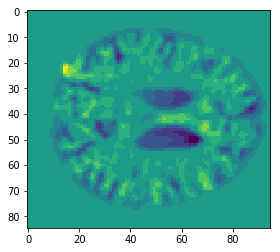

In [3]:
sess = tf.Session()
dat = sess.run(it['mri'])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(dat[:,:,50])
plt.show()

In [4]:
cond = tf.equal(it['health_ad'], 1)
for i in range(32):
    c = sess.run(cond)
    print c

[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


In [5]:
import tensorflow as tf
from src.model import model_fn
from src.input import train_input, test_input
config = tf.estimator.RunConfig(model_dir="data/model")
nn = tf.estimator.Estimator(model_fn=model_fn, params={}, config=config)
tf.logging.set_verbosity(tf.logging.INFO)
for i in range(5):
    nn.train(input_fn=train_input)
    nn.evaluate(input_fn=test_input)


ImportError: cannot import name model_fn